In [38]:
import pandas as pd
import numpy as np

def find_spread(z_score, window):
    spread_mavg = z_score.rolling(window=window).mean()
    spread_std = z_score.rolling(window=window).std()
    upper_band = spread_mavg + spread_std
    lower_band = spread_mavg - spread_std
    return upper_band, lower_band

# def pairs_trading_strategy(asset1, asset2, window=30):
#     # Calculate price ratios
#     ratio = asset1 / asset2

#     # Calculate z-score of the ratio
#     z_score = (ratio - ratio.mean()) / np.std(ratio)

#     # Find upper and lower bands for trading signals
#     upper_band, lower_band = find_spread(z_score, window)

#     # Trading signals
#     go_long = z_score < lower_band
#     go_short = z_score > upper_band
#     exit = (z_score >= lower_band) & (z_score <= upper_band)

#     # Positions
#     positions = pd.DataFrame(index=asset1.index).fillna(0.0)
#     positions['asset1'] = np.where(go_long, 1, np.where(go_short, -1, 0))
#     positions['asset2'] = -positions['asset1']

#     return positions,z_score,upper_band, lower_band 

def pairs_trading_strategy(asset1, asset2, window=30):
    # Calculate price ratios
    ratio = asset1 / asset2

    # Calculate z-score of the ratio
    z_score = (ratio - ratio.mean()) / np.std(ratio)

    # Find upper and lower bands for trading signals
    upper_band, lower_band = find_spread(z_score, window)

    # Trading signals
    go_long = z_score < lower_band
    go_short = z_score > upper_band
    exit = (z_score >= lower_band) & (z_score <= upper_band)

    # Positions
    positions = pd.DataFrame(index=asset1.index).fillna(0.0)
    positions['y'] = np.where(go_long, 1, np.where(go_short, -1, 0))
    positions['x'] = -positions['y']

    return positions,z_score,upper_band, lower_band 



def calculate_daily_returns(asset):
    return asset.pct_change()


def compute_strategy_returns(positions, asset1, asset2):
    # Calculate daily returns for each asset
    asset1_returns = calculate_daily_returns(asset1)
    asset2_returns = calculate_daily_returns(asset2)

    # Calculate daily strategy returns
    # Shift the positions by one day to simulate today's returns based on yesterday's positions
    strategy_returns = positions.shift(1) * pd.concat([asset1_returns, asset2_returns], axis=1)
    daily_returns = strategy_returns.sum(axis=1)

    return daily_returns


In [39]:
# tickers = ["DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "BA", "WMT", "GS", "XOM", "META", "BRK-B", "MSFT", "QQQ"]
tickers = ["BTC-USD", "ETH-USD"]
# tickers = ["MSFT", "QQQ"]

start_date = datetime(2018, 1, 1)
end_date = datetime(2024, 1, 27)
tickData = get_all_adjusted_close_data(start_date, end_date, tickers)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [46]:
import pyfolio as pf
# This is a sample Python script.
from datetime import datetime
import time

# from src.pairs.pairs_strategy import TradingPair
import yfinance as yf

from src.pairs.pair_strategy import PairStrategy
from src.pairs.coint_functions import *

from src.pairs.portfolio import Portfolio


from src.util.DataFetcher import *

import pandas as pd
import statsmodels.api as sm

from statsmodels.tools.tools import add_constant

import numpy as np

In [47]:
positions= pairs_trading_strategy(tickData['BTC-USD'], tickData['ETH-USD'])
daily_returns = compute_strategy_returns(positions, tickData['BTC-USD'],  tickData['ETH-USD'])

AttributeError: 'tuple' object has no attribute 'shift'

In [42]:
positions.plot()

AttributeError: 'tuple' object has no attribute 'plot'

In [43]:
positions.plot()

AttributeError: 'tuple' object has no attribute 'plot'

(<Axes: xlabel='Date'>, <Axes: xlabel='Date'>, <Axes: xlabel='Date'>)

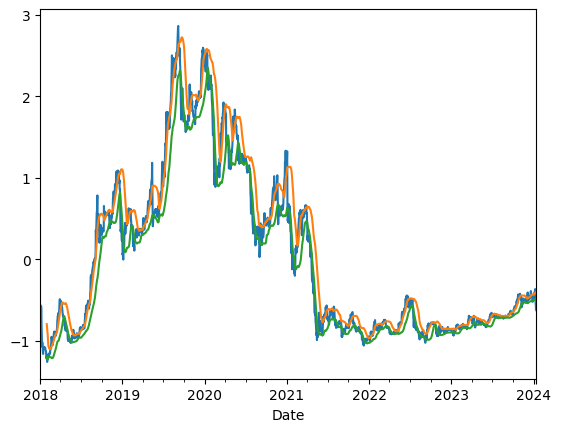

In [44]:
z_score.plot(),upper_band.plot(), lower_band.plot()

<Axes: xlabel='Date'>

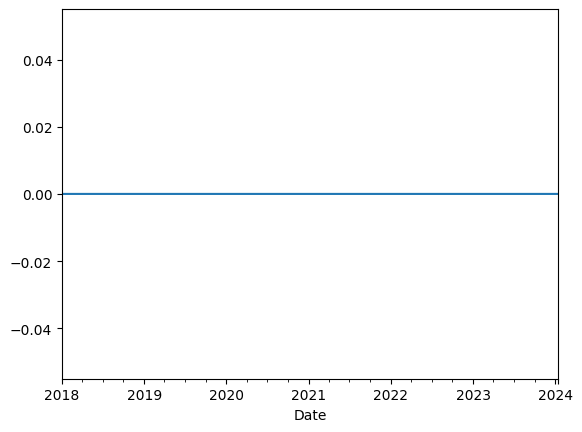

In [45]:
daily_returns.plot()